In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1: Class exercise 
Given the vector `val = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],`

write two different sets of code to compute the squares of all the elements in the vector `val`

In [2]:
#Solution
val = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print val**2


[  1   4   9  16  25  36  49  64  81 100]


In [3]:
val  = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10] )#this is called a list
newval = np.zeros(val.size)

for ii in val-1:
    newval[ii] = val[ii]**2
print newval

[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


### Example 2
Write three different codes to compute the value of $f(3)$ if $f(x) = x^3 + 3x^2 - 2x - 1$


In [4]:
#solution 1
x=3
f =  x**3 + 3.*x**2 - 2.*x - 1.

print f

47.0


In [5]:
#solution 2
def funcf(x):
    f2 =  x**3 + 3.*x**2 - 2.*x - 1.
    print f2

In [6]:
#running the code for solution 2 with x=3
funcf(3)

47.0


In [7]:
#solution 3
f = lambda x:  x**3 + 3.*x**2 - 2.*x - 1. 

f(3)


47.0

### Example 3
Write a code to compute the value of $f(3)$ and  $f(1)$ if $f(x) = x^3 + 3x^2 - 2x - 1$



In [8]:
f = lambda x:  x**3 + 3.*x**2 - 2.*x - 1.
fa, fb = f(3), f(1)
print fa, fb



47.0 1.0


### Example 4
Write two different codes to compute the value of $f(x,y)$ when $x = 3$ and $y=2$ if $f(x,y) = y(x^3 + 3x^2 - 2x - 1)$



In [9]:
#solution 1
f = lambda x, y:  y*(x**3 + 3.*x**2 - 2.*x - 1.)

f(3,2)

94.0

In [10]:
#solution 2
def funcf2(x,y):
    fval_2 =  y*(x**3 + 3.*x**2 - 2.*x - 1.)
    print fval_2

In [11]:
#running the code for solution 2 with x=3
funcf2(3,2)

94.0


# Root Finding

## Bisection Method
The point of this section is pretty straightforward.  I give you a function $f(x)$ and an interval, say $[a,b]$.  Now you tell me those points $c_{\ast}\in[a,b]$ such that 

$$
f(c_{\ast}) = 0.
$$

The first approach we are going to study is called the _ Bisection Method _.  It relies on there being a sign change over the interval $[a,b]$.  Said another way, for the Bisection Method to work we need

> ** Criteria for Bisection Method **: For the Bisection method to work on an interval $[a,b]$, we need $f$ to be continuous on $[a,b]$, and we need $f(a)f(b)<0$.

The sign change ensures that there is some point $c \in (a,b)$ such that $f(c)=0$. Once we know the criteria is met, the method goes as follows.  

1.  Find the mid-point $c = \frac{b+a}{2}$. 
2.  Check $f(c)=0$.  If yes, you have a root.  
3.  If not, check $f(a)f(c)<0$.  If yes, you have a root in $(a,c)$.  If not, you have a root in $(c,b)$.
4.  Re-define your interval accordingly, repeat until... well what makes sense here?

![bsctmeth](https://upload.wikimedia.org/wikipedia/commons/8/8c/Bisection_method.svg)

### Example 5

We are going to write a python code to compute $\sqrt{2}$.  Let $x$ denote the answer for $\sqrt{2}$, then we can write that
$$x = \sqrt{2},$$ which is equivalent to

$$
x^{2}=2.  
$$

Subtracting 2 from both sides of the equation, we see that $\sqrt{2}$ is a root of the quadratic equation 
$$
x^{2}-2=0.
$$

So now we are going to use the __Bisection Method__ to write a code to find the roots of the function $f(x) = x^{2} - 2$.

#### solution

First lets plot the function $f(x)$ and the line $y=0$ to determine the approximate points that $f(x)=0$

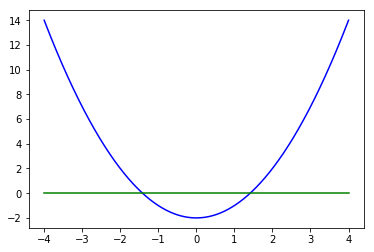

In [12]:
xvals = np.linspace(-4,4.,int(1e3))
yvals = xvals**2.- 2.
zvals = np.zeros(xvals.size)
plt.plot(xvals,yvals,color='b')
plt.plot(xvals,zvals,color='g')

From the graph, we have two points where $f(x)=0$, one is x in (-2,0) and another is x in (0,2). We work out the Python code below.

In [13]:

def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    
    if fa*fb<0:
        c = (a+b)/2.
        capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c
            else:
                a = c
          
            c = (a+b)/2.
            capproxs = np.append(capproxs,c)
            fc = f(c)
     
        print "Our root is: %1.15f" %c
    else:
        print "Cannot ensure existence of root."

In [14]:
f = lambda x: x**2 - 2.



In [15]:
#The first root is between the x interval (0,2)
bisec_method(0.,2.,f,1e-13)

Our root is: 1.414213562373106


In [16]:
#The second root is between the x interval (-2,0)
bisec_method(-2.,0.,f,1e-13)

Our root is: -1.414213562373106


### Example 6
Use the __Bisection Method__ to write a code to find the roots of the function $f(x) = x^3 + 3x^2 - 2x - 1.$.

##### solution

In [17]:
f = lambda x: x**3 + 3.*x**2 - 2.*x - 1.

In [18]:
#The first root is between the x interval (-5,3)
bisec_method(-5.,3.,f,1e-13)

Our root is: -3.490863615361036


In [19]:
#The second root is between the x interval (-1,0)
bisec_method(-1,0.,f,1e-13)


Our root is: -0.343379568952912


In [20]:
#The third root is between the x interval (0,2)
bisec_method(0.,2.,f,1e-13)

Our root is: 0.834243184313920
